# Head 1st / Head 2nd / Work 1st / Work 2nd

In [1]:
import pyreadstat
import os
import gc
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

.sav ===> import pyreadstat, pyreadstat.read_sav(file_path)

.sas7bdat  ====> pandas, pd.read_sas(file_path)

.dta  ===> pd.read_stata(file_path)

In [2]:
def call_work_df():
    path = 'C:/Users/hml76/Desktop/Jupyter/HRD_With_MJ/HCCPII_20230828/'
    file_path = path+'2. SPSS/HCCP_2ndWave_Work_2nd.sav'

    dataframe, meta = pyreadstat.read_sav(file_path)
    columns_to_drop0 = ['W21ID2', 'W21ID3']
    dataframe = dataframe.drop(columns=columns_to_drop0)
    
    #y = df[y_name]
    #df.drop(columns=[y_name])
    gc.collect()
    return dataframe

In [3]:
def call_head_df():
    path = 'C:/Users/hml76/Desktop/Jupyter/HRD_With_MJ/HCCPII_20230828/'
    file_path = path+'3. SAS/hccp_2ndwave_head_2nd.sas7bdat'

    dataframe = pd.read_sas(file_path)
    #columns_to_drop0 = ['W21ID2', 'W21ID3']
    #dataframe = dataframe.drop(columns=columns_to_drop0)
    
    #y = df[y_name]
    #df.drop(columns=[y_name])
    gc.collect()
    return dataframe

In [4]:
def check_nan(input_dataframe):
    nan_values = input_dataframe.isna()
    nan_count_per_column = nan_values.sum()
    Nan_cols = []
    columns_with_nan = nan_count_per_column[nan_count_per_column > 0]  # Filter columns with NaN values
    print("Columns with NaN values and count of NaN values:")
    for column, count in columns_with_nan.items():
        print(f"Column '{column}' has {count} NaN value(s).")
        Nan_cols.append(column)    
        
    dataframe = input_dataframe.drop(columns=Nan_cols)
    return dataframe


def equal_distirubution(dataframe, y_lst, class_idx):
    class_counts = dataframe[y_lst[class_idx]].value_counts()
    print(class_counts)
    max_samples, min_samples = class_counts.max(), class_counts.min()
    
    balanced_df = pd.DataFrame()  # Initialize an empty DataFrame to store the balanced data
    
    for class_label, count in class_counts.items():
        if count == min_samples:      # If the class count is equal to the maximum number of samples, keep all samples
            balanced_df = pd.concat([balanced_df, dataframe[dataframe[Y[class_idx]] == class_label]])
        else:
            sampled_df = dataframe[dataframe[Y[class_idx]] == class_label].sample(min_samples, replace=True)  # Randomly sample the same number of samples from the class
            balanced_df = pd.concat([balanced_df, sampled_df])
    
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle the rows 
    y_balanced = balanced_df[Y[class_idx]]
    print(y_balanced.value_counts())
    X_balanced = balanced_df.drop(columns=Y)
    
    return X_balanced, y_balanced

In [5]:
def XGBoost(X_balanced, y_balanced, num_boost_round = 300):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    model = XGBClassifier(n_estimators=num_boost_round)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("\tAccuracy ========> ", accuracy)
    
    #plot_importance(model, max_num_features=10)
    #plt.show()
    
    return model, X_train, X_test, y_test

In [6]:
def feature_imp1(input_model, X_train_, top_k):
    feature_importance = input_model.feature_importances_
    top_indices = np.argsort(feature_importance)[::-1][:top_k]
    top_indices = X.columns[top_indices]
    print(top_indices)
    #for feature, importance in zip(top_5_features, feature_importance[top_5_indices]):
    #    print(f"{feature}: {importance}")

    #sorted_idx = np.argsort(feature_importance)[::-1]
    #top_features = X_train_.columns[sorted_idx][:top_k]
    #print("\nTop 10 Feature Importance:")
    #for i, feature in enumerate(top_features):
    #    print(f"{i+1}. {feature}: {feature_importance[sorted_idx[i]]:.4f}")

In [7]:
def feature_imp2(input_model, max_num_features):
    plot_importance(input_model, max_num_features)
    plt.show()

In [8]:
def class_one_to_five_TO_one_to_two(dataframe, y_lst, class_idx):
    dataframe_1 = dataframe[dataframe[y_lst[class_idx]] != 3]
    dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
    #dataframe_1 = dataframe_1.drop(columns=y_lst[class_idx])
    #print(dataframe_1[y_lst[class_idx]])
    return dataframe_1

In [9]:
def erase_col_for_importance(dataframe, erase_col_lst):
    dataframe = dataframe.drop(columns=erase_col_lst)
    
    return dataframe

In [10]:
df_head = call_head_df()
df_work = call_work_df()

df_head = check_nan(df_head)

df_head.rename(columns={'C21_ID1': 'W21ID1'}, inplace=True)
df_head.rename(columns={'C21_IND1': 'W21IND1'}, inplace=True)
df_head.rename(columns={'C21_SCALE': 'W21SCALE'}, inplace=True)

df_work = check_nan(df_work)

df = pd.merge(df_work, df_head, on='W21ID1', how='inner')

Columns with NaN values and count of NaN values:
Column 'C21_SEX2' has 387 NaN value(s).
Column 'C21_SEX3' has 490 NaN value(s).
Column 'C21A01_021' has 399 NaN value(s).
Column 'C21A01_061' has 325 NaN value(s).
Column 'C21A01_062A' has 325 NaN value(s).
Column 'C21A01_062B' has 328 NaN value(s).
Column 'C21A01_07B' has 232 NaN value(s).
Column 'C21A02_08A' has 376 NaN value(s).
Column 'C21A02_08B' has 382 NaN value(s).
Column 'C21A02_08C' has 473 NaN value(s).
Column 'C21A02_08D' has 462 NaN value(s).
Column 'C21A02_08E' has 498 NaN value(s).
Column 'C21A02_08F' has 181 NaN value(s).
Column 'C21B02_05F3' has 1 NaN value(s).
Column 'C21B02_06B' has 357 NaN value(s).
Column 'C21B02_08B' has 444 NaN value(s).
Column 'C21B02_10A1' has 20 NaN value(s).
Column 'C21B02_10A2' has 20 NaN value(s).
Column 'C21B02_10A3' has 21 NaN value(s).
Column 'C21B02_10A4' has 21 NaN value(s).
Column 'C21B02_10A5' has 20 NaN value(s).
Column 'C21B02_10A6' has 20 NaN value(s).
Column 'C21B02_10B1' has 20 Na

In [11]:
scaler = MinMaxScaler()
#df = call_df()
#df = check_nan(df)
DF = copy.deepcopy(df)

# 1. 비공식학습 참여여부

(1)동료에 의한 코칭 및 멘토링_비공식적 학습 방법 참여 여부

(2)상사에 의한 코칭 및 멘토링_비공식적 학습 방법 참여 여부

(3)직원들 개개인 간의 지식 및 노하우 공유_비공식적 학습 방법 참여 여부

(4)사내 플랫폼을 통한 지식 공유_비공식적 학습 방법 참여 여부

(5)직무순환을 통한 학습_비공식적 학습 방법 참여 여부

In [14]:
#binary class
Y = ['W21Q15A1', 'W21Q15B1', 'W21Q15C1', 'W21Q15D1', 'W21Q15E1'] #1. 비공식학습 참여여부  => 성능 나쁨; 거의 65% 
#Y2 = ['W21Q15A2', 'W21Q15B2', 'W21Q15C2', 'W21Q15D2', 'W21Q15E2'] # 비공식학습 학습성과 

for i in range(len(Y)):
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X, y = equal_distirubution(df, Y, i)
    y=y-1
    
    #X = erase_col_for_importance(X, list2)
    model, x_tr, _, _ = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)


 W21Q15A1 

1.0    5029
2.0    4487
Name: W21Q15A1, dtype: int64
1.0    4487
2.0    4487
Name: W21Q15A1, dtype: int64
	Accuracy ========>  0.724233983286908
Index(['W21Q12B', 'C21C05_02E1', 'W21Q10A', 'C21C04_07', 'W21Q22D',
       'C21A01_05', 'C21B02_05C4', 'C21B04_01', 'W21Q28', 'W21Q062B'],
      dtype='object')

 W21Q15B1 

1.0    5538
2.0    3978
Name: W21Q15B1, dtype: int64
2.0    3978
1.0    3978
Name: W21Q15B1, dtype: int64
	Accuracy ========>  0.7336683417085427
Index(['C21D06_04A', 'C21C05_01A2', 'W21Q11A1', 'W21Q10A', 'W21Q22B',
       'C21B02_08A', 'C21C05_03A3', 'W21Q083B', 'W21Q14F', 'C21B04_01'],
      dtype='object')

 W21Q15C1 

1.0    5932
2.0    3584
Name: W21Q15C1, dtype: int64
2.0    3584
1.0    3584
Name: W21Q15C1, dtype: int64
	Accuracy ========>  0.7078103207810321
Index(['W21Q10A', 'W21Q22D', 'W21Q22F', 'W21Q12A', 'W21Q11A1', 'C21C05_03G3',
       'C21B04_01', 'C21C05_03E3', 'C21C05_02E1', 'W21Q14E'],
      dtype='object')

 W21Q15D1 

2.0    5690
1.0    3826

# 3. 자기주도학습 참여여부

(1)학원 수강료 지원 제도_2019년 자기주도적 학습 지원 제도 참여 여부

(2)국내 대학 등록금 지원 제도_2019년 자기주도적 학습 지원 제도 참여 여부

(3)국내 대학원 등록금 지원 제도_2019년 자기주도적 학습 지원 제도 참여 여부

(4)해외 대학원 학위과정 지원 제도_2019년 자기주도적 학습 지원 제도 참여 여부

In [15]:
#Binary Class
Y = ['W21Q16A1', 'W21Q16B1', 'W21Q16C1', 'W21Q16D1']  #2. 자기주도학습 참여여부 => 성능 괜찮음: 76 ~ 92%
#Y2 = ['W21Q16A2', 'W21Q16B2', 'W21Q16C2', 'W21Q16D2']  #자기주도학습 학습성과

In [16]:
for i in range(len(Y)):
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X, y = equal_distirubution(df, Y, i)
    
    y=y-1
    model, x_tr, _, _ = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)


 W21Q16A1 

2.0    6895
1.0    2621
Name: W21Q16A1, dtype: int64
2.0    2621
1.0    2621
Name: W21Q16A1, dtype: int64
	Accuracy ========>  0.7235462345090562
Index(['W21Q12B', 'C21B02_05G4', 'C21C05_01C1', 'W21Q17', 'C21C02_01B1',
       'C21C02_03A', 'C21D01_0241', 'W21Q11B1', 'W21Q15A1', 'C21B01_01C'],
      dtype='object')

 W21Q16B1 

2.0    9294
1.0     222
Name: W21Q16B1, dtype: int64
1.0    222
2.0    222
Name: W21Q16B1, dtype: int64
	Accuracy ========>  0.7528089887640449
Index(['W21Q12C', 'C21C05_02C1', 'C21A01_07A', 'C21B01_02H', 'C21B02_02D',
       'W21Q301', 'W21Q10A', 'W21Q15B1', 'C21A01_04', 'C21B02_02A'],
      dtype='object')

 W21Q16C1 

2.0    9409
1.0     107
Name: W21Q16C1, dtype: int64
2.0    107
1.0    107
Name: W21Q16C1, dtype: int64
	Accuracy ========>  0.7441860465116279
Index(['W21Q17', 'W21Q12C', 'W21Q23C', 'W21Q25J', 'W21Q10C', 'C21B02_12A3',
       'C21B02_04D', 'C21B01_02B', 'C21D06_02A', 'C21B02_02C'],
      dtype='object')

 W21Q16D1 

2.0    9456
1.0 

# 5. 조직신뢰 

(1)직원들에게 회사 사정을 소상하게 알려준다

(2)상급자에게 의견을 자유롭게 낼 수 있다

(3)부서간의 커뮤니케이션이 잘 되는 편이다

(4)동료들 간에 서로 신뢰한다

(5)평가 및 보상이 공정하게 이루어진다

(6)경영진은 모든 면에서 믿고 따라갈 만하다

2개로 줄임: Class (1, 2) ====> 1 & (4, 5) ====> 2 & (3) ====> 삭제 

In [19]:
#Multi Class - 5
Y = ['W21Q24A', 'W21Q24B', 'W21Q24C', 'W21Q24D', 'W21Q24E', 'W21Q24F']

for i in range(len(Y)):  
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    
    X, y = equal_distirubution(X, Y, i)
    
    y=y-1
    model, x_tr, _, _ = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)


 W21Q24A 

2    3563
1    2386
Name: W21Q24A, dtype: int64
2    2386
1    2386
Name: W21Q24A, dtype: int64
	Accuracy ========>  0.8586387434554974
Index(['W21Q23B', 'W21Q25B', 'W21Q25A', 'W21Q23C', 'W21Q261', 'W21Q09G',
       'C21C01_04C1', 'C21C04_01C2', 'W21Q25E', 'C21C05_03C2'],
      dtype='object')

 W21Q24B 

2    4144
1    1716
Name: W21Q24B, dtype: int64
2    1716
1    1716
Name: W21Q24B, dtype: int64
	Accuracy ========>  0.8675400291120815
Index(['W21Q25B', 'W21Q23B', 'W21Q25A', 'W21Q23D', 'W21Q25D', 'W21Q25C',
       'C21B02_05A4', 'W21Q22F', 'C21C05_02C2', 'C21C02_02A1'],
      dtype='object')

 W21Q24C 

2    3855
1    1744
Name: W21Q24C, dtype: int64
2    1744
1    1744
Name: W21Q24C, dtype: int64
	Accuracy ========>  0.8925501432664756
Index(['W21Q25D', 'W21Q25F', 'W21Q23B', 'W21Q261', 'W21Q25B', 'W21IND1_x',
       'W21Q11A1', 'W21Q22D', 'C21B02_05G2', 'C21B02_05D4'],
      dtype='object')

 W21Q24D 

2    4755
1    1008
Name: W21Q24D, dtype: int64
1    1008
2    1008


# 6. 직무만족 

(1)현재 하고 있는 일의 내용에 만족한다

(2)현재 받고 있는 임금에 만족한다

(3)현재 직장의 인간관계에 만족한다

하고 있는 일에 대한 전반적 만족도

In [20]:
Y = ['W21Q26A', 'W21Q26B', 'W21Q26C', 'W21Q261']

for i in range(len(Y)):  
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    
    X, y = equal_distirubution(X, Y, i)
    
    y=y-1
    model, x_tr, _, _ = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)


 W21Q26A 

2    5484
1     835
Name: W21Q26A, dtype: int64
1    835
2    835
Name: W21Q26A, dtype: int64
	Accuracy ========>  0.8323353293413174
Index(['W21Q27D', 'W21Q23B', 'W21Q25A', 'W21Q25F', 'C21C01_07', 'W21Q24B',
       'W21IND1_x', 'W21Q22A', 'W21Q22D', 'W21Q23D'],
      dtype='object')

 W21Q26B 

2    3494
1    2359
Name: W21Q26B, dtype: int64
2    2359
1    2359
Name: W21Q26B, dtype: int64
	Accuracy ========>  0.861228813559322
Index(['W21Q24E', 'W21Q27D', 'W21Q23A', 'W21Q25B', 'C21B02_05G1', 'W21Q27A',
       'C21C05_02C2', 'W21Q09F', 'C21D06_04D', 'C21C05_03D2'],
      dtype='object')

 W21Q26C 

2    6010
1     617
Name: W21Q26C, dtype: int64
1    617
2    617
Name: W21Q26C, dtype: int64
	Accuracy ========>  0.8299595141700404
Index(['W21Q24D', 'W21Q09B', 'W21Q25D', 'C21C04_01B1', 'W21Q14E',
       'C21C04_01B2', 'C21A02_01', 'W21Q081A', 'W21Q25E', 'W21Q062C'],
      dtype='object')

 W21Q261 

2    4658
1     787
Name: W21Q261, dtype: int64
1    787
2    787
Name: W21Q2

# 7. 조직몰입 

(1) 나는 조금이라도 좋은 조건을 제시하는 회사가 있으면 옮길 것을 고려해 보고 있다

(2) 나는 이 회사의 문제를 내 문제처럼 느낀다

(3) 만약 내가 이 회사를 떠나기로 결정한다면 내 인생의 너무 많은 것을 잃게 될 것이다

(4) 이 회사는 내가 충성할 만한 가치가 있다

In [21]:
Y = ['W21Q27A', 'W21Q27B', 'W21Q27C', 'W21Q27D']

for i in range(len(Y)):  
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    
    X, y = equal_distirubution(X, Y, i)
    
    y=y-1
    model, x_tr, _, _ = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)


 W21Q27A 

2    3684
1    2354
Name: W21Q27A, dtype: int64
2    2354
1    2354
Name: W21Q27A, dtype: int64
	Accuracy ========>  0.832271762208068
Index(['W21Q261', 'C21C01_07', 'W21Q27E', 'C21C05_02D1', 'W21Q27F',
       'C21C05_02E3', 'C21C05_03C2', 'W21DQ02A', 'C21B02_05G2', 'C21B02_05G4'],
      dtype='object')

 W21Q27B 

2    4765
1    1227
Name: W21Q27B, dtype: int64
1    1227
2    1227
Name: W21Q27B, dtype: int64
	Accuracy ========>  0.7881873727087576
Index(['W21Q261', 'W21Q24F', 'W21Q24A', 'C21B02_05G3', 'C21D06_04A', 'W21Q23D',
       'W21Q03B', 'W21Q25F', 'W21Q061D', 'C21C02_03D'],
      dtype='object')

 W21Q27C 

1    3409
2    2419
Name: W21Q27C, dtype: int64
2    2419
1    2419
Name: W21Q27C, dtype: int64
	Accuracy ========>  0.8254132231404959
Index(['W21Q261', 'W21Q24F', 'C21D06_04A', 'C21D06_04E', 'W21Q09F', 'W21Q24A',
       'C21C05_03A1', 'W21Q26B', 'C21B01_01A', 'W21Q01A'],
      dtype='object')

 W21Q27D 

2    3509
1    1669
Name: W21Q27D, dtype: int64
1    1669

# 8. 번아웃 

(6) 나는 현재 업무로 인해 무력감이나 피곤함을 느낄 때가 많아졌다

In [ ]:
imp_lst1 = ['W21Q27E', 'W21Q27G', 'W21Q261', 'W21Q26A', 'W21Q27A']
imp_lst2 = ['W21ID1', 'W21Q04', 'W21Q27G', 'W21DQ02A', 'W21Q27E']

In [22]:
Y = ['W21Q27F']

for i in range(len(Y)):  
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    
    X, y = equal_distirubution(X, Y, i)
    
    y=y-1
    #X = erase_col_for_importance(X, imp_lst1)
    
    model, x_tr, x_tst, y_tst = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=15)


 W21Q27F 

2    3159
1    2329
Name: W21Q27F, dtype: int64
2    2329
1    2329
Name: W21Q27F, dtype: int64
	Accuracy ========>  0.8497854077253219
Index(['W21Q27E', 'C21C05_02F1', 'W21Q27G', 'W21Q261', 'W21Q27A', 'W21Q26A',
       'C21C05_01C1', 'C21C05_03D1', 'C21C04_01C2', 'C21B02_05A4',
       'C21D06_04C', 'C21C05_03G2', 'C21C05_03A3', 'C21B02_02A', 'C21B02_11'],
      dtype='object')


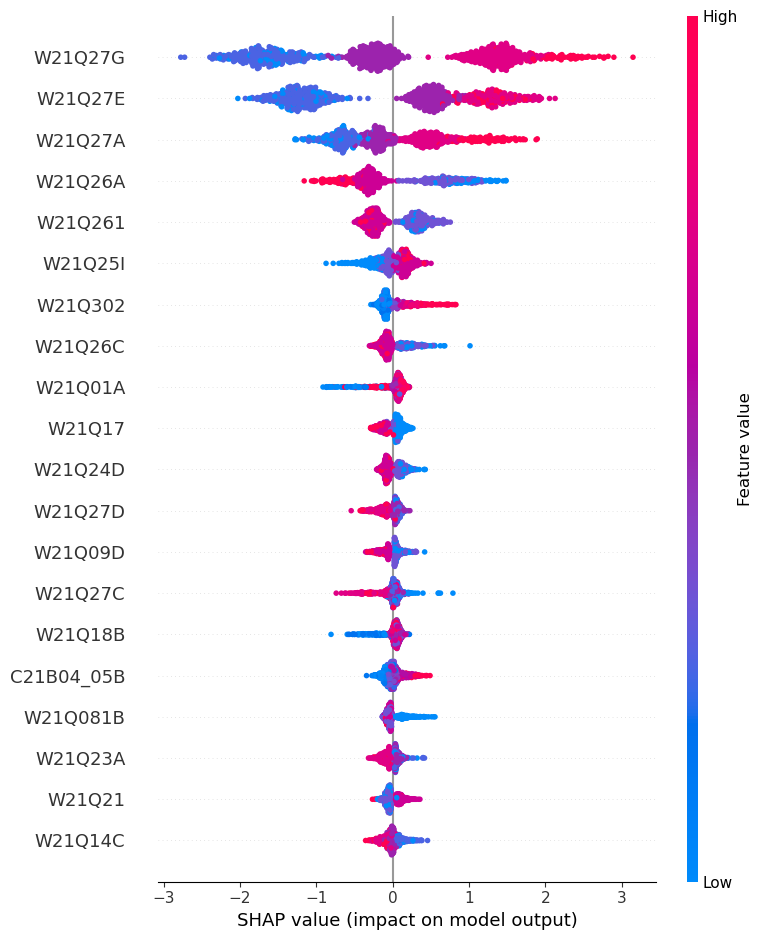

In [23]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_tst)

# Visualize SHAP values
shap.summary_plot(shap_values, x_tst)

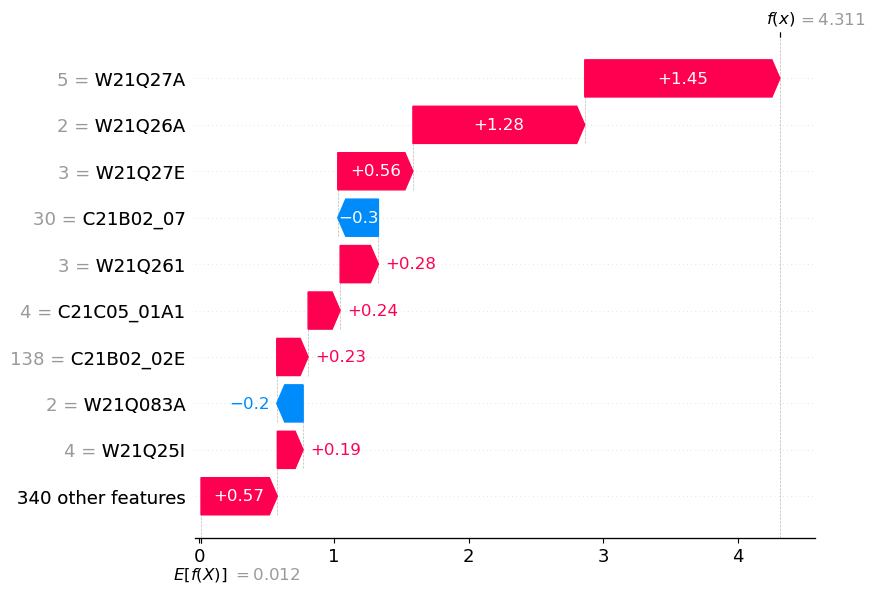

In [24]:
sv = explainer(X)
shap.plots.waterfall(sv[0])

In [25]:
import shap

shap.initjs()
sv = explainer(X)
shap.plots.force(sv[0])

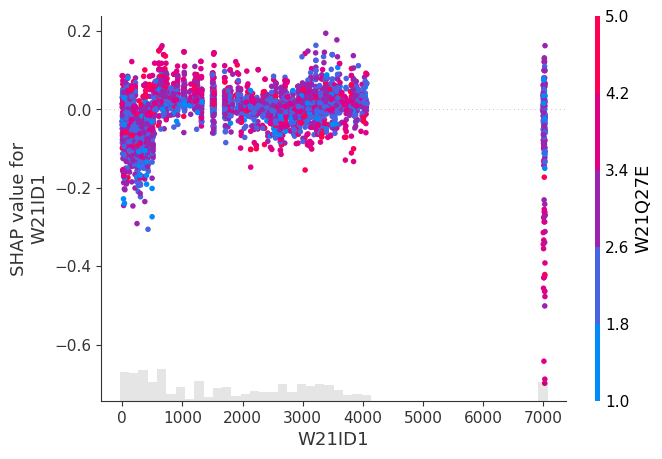

In [26]:
shap.plots.scatter(sv[:,"W21ID1"], color=sv)

In [27]:
imp_lst1 = ['W21Q27E', 'W21Q27G', 'W21Q261', 'W21Q26A', 'W21Q27A']
imp_lst2 = ['W21ID1', 'W21Q04', 'W21Q27G', 'W21DQ02A', 'W21Q27E']

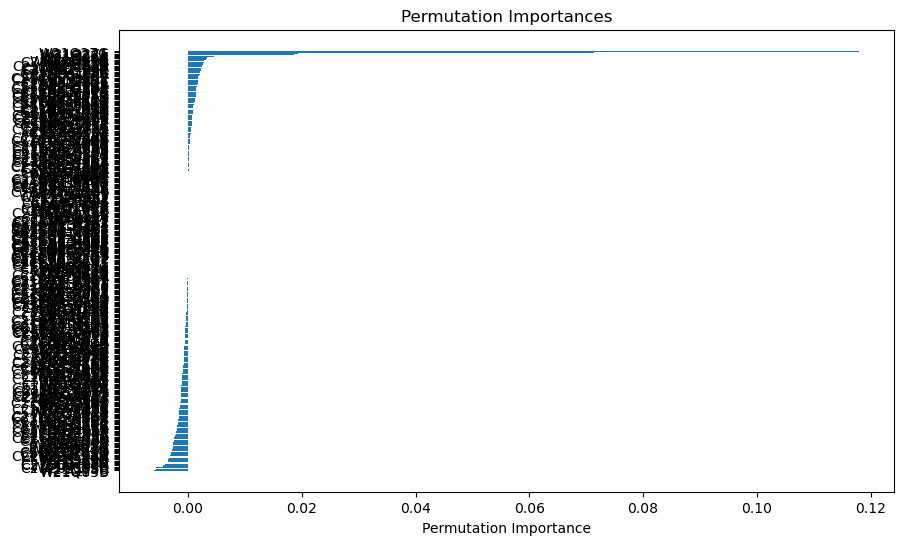

In [28]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, x_tst, y_tst, n_repeats=10, random_state=42)

feature_names = X.columns

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances')
plt.show()

In [29]:
feature_names[sorted_idx][-10:]

Index(['W21Q25B', 'C21B01_01B', 'W21Q083D', 'W21Q22E', 'W21Q10A', 'W21Q261',
       'W21Q27A', 'W21Q26A', 'W21Q27E', 'W21Q27G'],
      dtype='object')

# Feature importance랑 Permutation importance는 유사함 (sorting)

# SMOTE -> data augmentation based on synthetic dataset

justification: 심하게 skewed 된 학습데이터만 증강 기법을 써서 올림 => test 데이터 자체는 그대로 유지

Overfitting 이 보이는 시점이 있음 => 실제로 어느정도는 도움이 된다는 뜻

In [ ]:
from xgboost import XGBClassifier, plot_importance
scaler = MinMaxScaler()
from imblearn.over_sampling import SMOTE

X = df_no_nan.drop(columns=[Y[target_idx]])
y = df_no_nan[Y[target_idx]] 
X_normalized = scaler.fit_transform(X)
df = pd.DataFrame(X_normalized, columns=X.columns)

print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)

print(y_resampled.value_counts())

In [ ]:
y_resampled = y_resampled - 1

X_train, X_test, y_train, y_test = train_test_split(balanced_df, y_resampled, test_size=0.2, random_state=42)

num_boost_round = 300  
model = XGBClassifier(n_estimators=num_boost_round)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=True)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)